Create a classifier for predicting if a person is a democrat or republican based on their votes for different issues.

### Notes:
* This is a classification problem
* Data source: https://archive-beta.ics.uci.edu/ml/datasets/congressional+voting+records
* Other models using this dataset: check out the link above for more info on other models + papers using this data set
* Steps:    
    1. Download the data
    2. Visualise the data
    3. (If needed) clean, normalise, transform and visualise the data to get a feeling about potential relationships between the variables
    4. Try to find the most relevant features (feature selection)
    5. Try to create new features
    6. Agree on a metric (i.e. Precision and recall)
    7. Develop a classification model (start with simple models and then grow in complexity)    
    8. Analyse the results for train + test data and compare different models

In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('house-votes-84.csv')
df.columns = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [79]:
df['handicapped-infants'].value_counts()

n    235
y    187
?     12
Name: handicapped-infants, dtype: int64

In [80]:
df.describe()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,235,194,253,247,211,271,239,242,207,215,264,233,208,247,232,268


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Class Name                              434 non-null    object
 1   handicapped-infants                     434 non-null    object
 2   water-project-cost-sharing              434 non-null    object
 3   adoption-of-the-budget-resolution       434 non-null    object
 4   physician-fee-freeze                    434 non-null    object
 5   el-salvador-aid                         434 non-null    object
 6   religious-groups-in-schools             434 non-null    object
 7   anti-satellite-test-ban                 434 non-null    object
 8   aid-to-nicaraguan-contras               434 non-null    object
 9   mx-missile                              434 non-null    object
 10  immigration                             434 non-null    object
 11  synfue

In [82]:
# categ_cols = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

df = df.replace(to_replace = 'n', value = 0)
df = df.replace(to_replace = 'y', value = 1)
df = df.replace(to_replace = '?', value = 2)


df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,2
1,democrat,2,1,1,2,1,1,0,0,0,0,1,0,1,1,0,0
2,democrat,0,1,1,0,2,1,0,0,0,0,1,0,1,0,0,1
3,democrat,1,1,1,0,1,1,0,0,0,0,1,2,1,1,1,1
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1


<AxesSubplot:xlabel='Class Name', ylabel='count'>

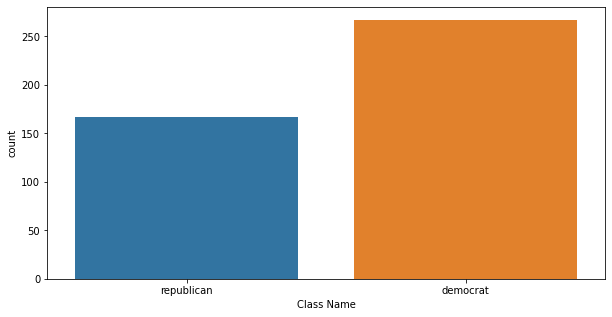

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'Class Name')

In [84]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class Name'], axis = 1)
y = df['Class Name']

print(X.shape, y.shape)


(434, 16) (434,)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(347, 16)
(347,)
(87, 16)
(87,)


In [86]:
def evaluate(model):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)

    print('model name', model)
    print ('accuracy', accuracy)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier(max_depth = 6)
rf = RandomForestClassifier(max_samples = 0.9)
knn = KNeighborsClassifier(n_neighbors = 5)

models = [lr, svm, dt, rf, knn]

for model in models:
    evaluate(model)

model name LogisticRegression()
accuracy 0.9310344827586207
model name SVC()
accuracy 0.9425287356321839
model name DecisionTreeClassifier(max_depth=6)
accuracy 0.9540229885057471
model name RandomForestClassifier(max_samples=0.9)
accuracy 0.9655172413793104
model name KNeighborsClassifier()
accuracy 0.9080459770114943


In [98]:
from sklearn.ensemble import StackingClassifier

base_models = [('RF', RandomForestClassifier(max_samples = 0.9)), ('KNN', KNeighborsClassifier(n_neighbors = 5))]
meta_model = RandomForestClassifier()
stacking_model = StackingClassifier(estimators = base_models, final_estimator = meta_model, passthrough = True, cv = 3)

In [99]:
stacking_model.fit(X_train, y_train)
stacking_model.score(X_test, y_test)

0.9655172413793104

<AxesSubplot:>

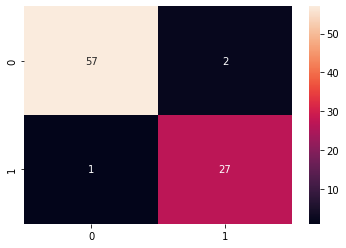

In [102]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = stacking_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')